# Content and Objective

+ Realizations of a Wiener phase noise process are generated
+ Histogram of phases at a given time is shown (thereby demonstrating the central limit theorem)

# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Function for Wiener Phase Noise

In [3]:
# Function for Generating Poisson Processes
def get_Wiener_phase_noise( N, Delta_t, volatility ):
    """
    Function generating a Wiener phase noise adding-up according Gaussians
    
    IN:     N, number of steps/changes to be simulated
            Delta_t, step size which is relevant for the according Gaussian
            volatility, corresponding to standard deviation of the generated Gaussian
              
    OUT:    X, Wiener phase noise
    """
    
    
    # sample steps uniformly out of { -1, +1 }
    steps = volatility * np.sqrt( Delta_t ) * np.random.randn( N-1 )

    # process by summing up increments
    X = np.append( 0, np.cumsum( steps ) )
    
    return X

# Showing a Bunch of Realizations for a Wiener Process

In [4]:
# increase N_real if multiple realization should be plotted
N_steps = 20
N_trials = 1000

# volatility
# essentially the slope of the phase change
volatility = 1

# you may use a different step size if you like to...
# NOTE: Delta_t and volatility actually are simply combined
Delta_t = 1


# initialize array for storing multiple processes
X_Wiener_phase_noise = np.zeros( ( N_trials, N_steps + 1 ) )

# loop for realizations
for n in range( N_trials ):
    
    # get realizations of Poisson process
    X_Wiener_phase_noise[ n, : ] = get_Wiener_phase_noise( N_steps + 1, Delta_t, volatility )

Text(0, 0.5, 'histogram of phases')

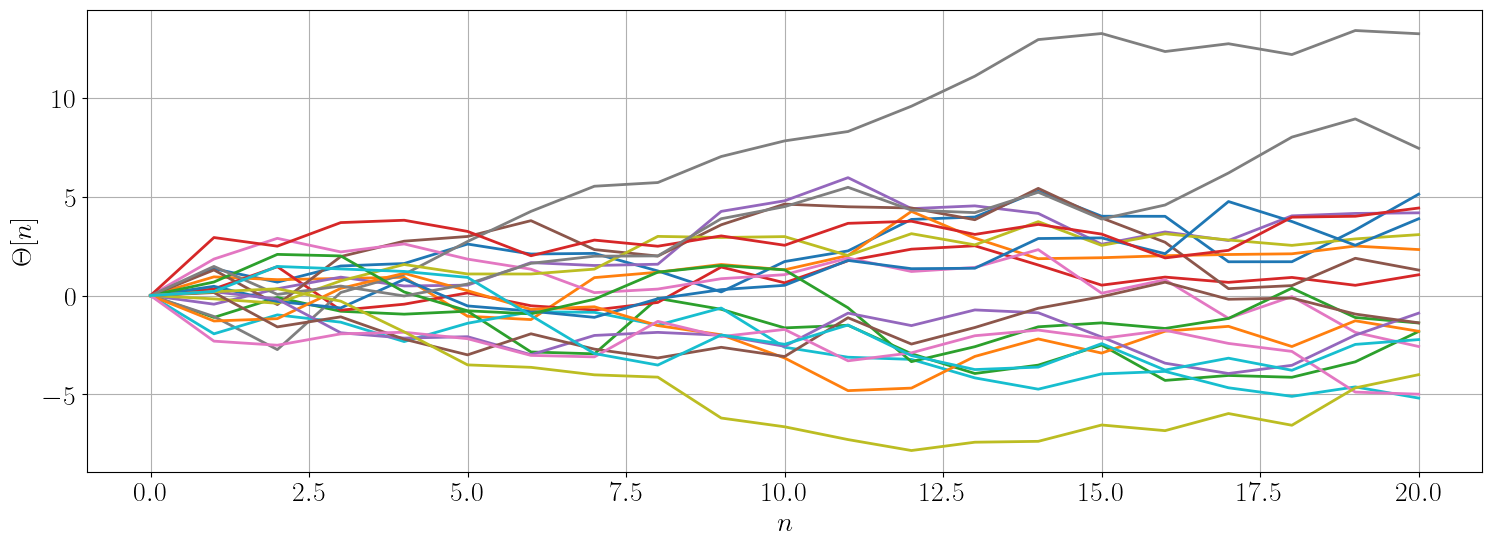

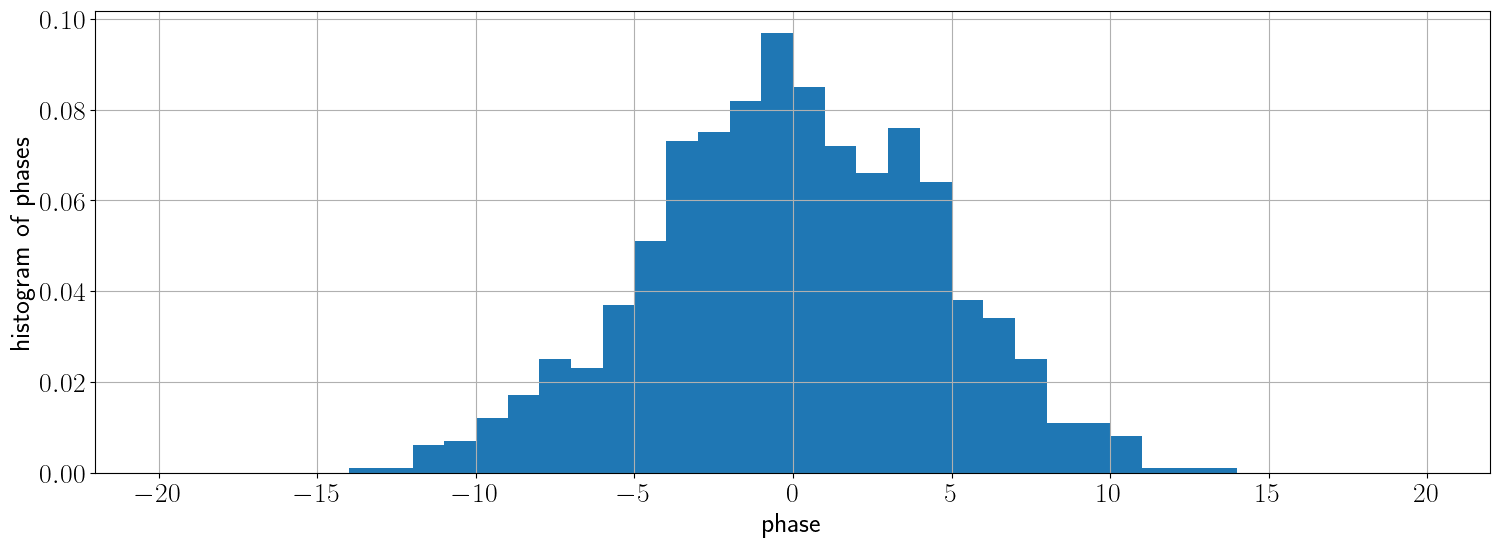

In [5]:
# plotting
for n in np.arange( 20 ): 
    plt.plot( X_Wiener_phase_noise[ n, :], linewidth = 2.0 )    

plt.grid( True )
plt.xlabel('$n$')
plt.ylabel('$\\Theta[n]$')


# extract end-points
results_end = X_Wiener_phase_noise[ : , -1 ]

# get histogram
num_bins = 2 * N_steps + 1
width = 1
bins = np.linspace( - N_steps*Delta_t*volatility, N_steps*Delta_t*volatility, num_bins, endpoint=True)

plt.figure()
plt.hist( results_end, bins=bins, density=1) ;
plt.grid(1)
plt.xlabel('phase')
plt.ylabel('histogram of phases')



In [6]:
# now, let's look what mod $ 2\pi$ is resulting in...
# different number of trials may make sense here...

# increase N_real if multiple realization should be plotted
N_steps = 50
N_trials = 10000

# volatility
# essentially the slope of the phase change
volatility = 1

# you may use a different step size if you like to...
# NOTE: Delta_t and volatility actually are simply combined
Delta_t = 1


# initialize array for storing multiple processes
X_Wiener_phase_noise = np.zeros( ( N_trials, N_steps + 1 ) )

# loop for realizations
for n in range( N_trials ):
    
    # get realizations of Poisson process
    X_Wiener_phase_noise[ n, : ] = get_Wiener_phase_noise( N_steps + 1, Delta_t, volatility )

# now mod 2pi
X_Wiener_phase_noise_mod_pi = np.mod( X_Wiener_phase_noise, 2*np.pi ) - np.pi 

Text(0, 0.5, 'histogram of phases')

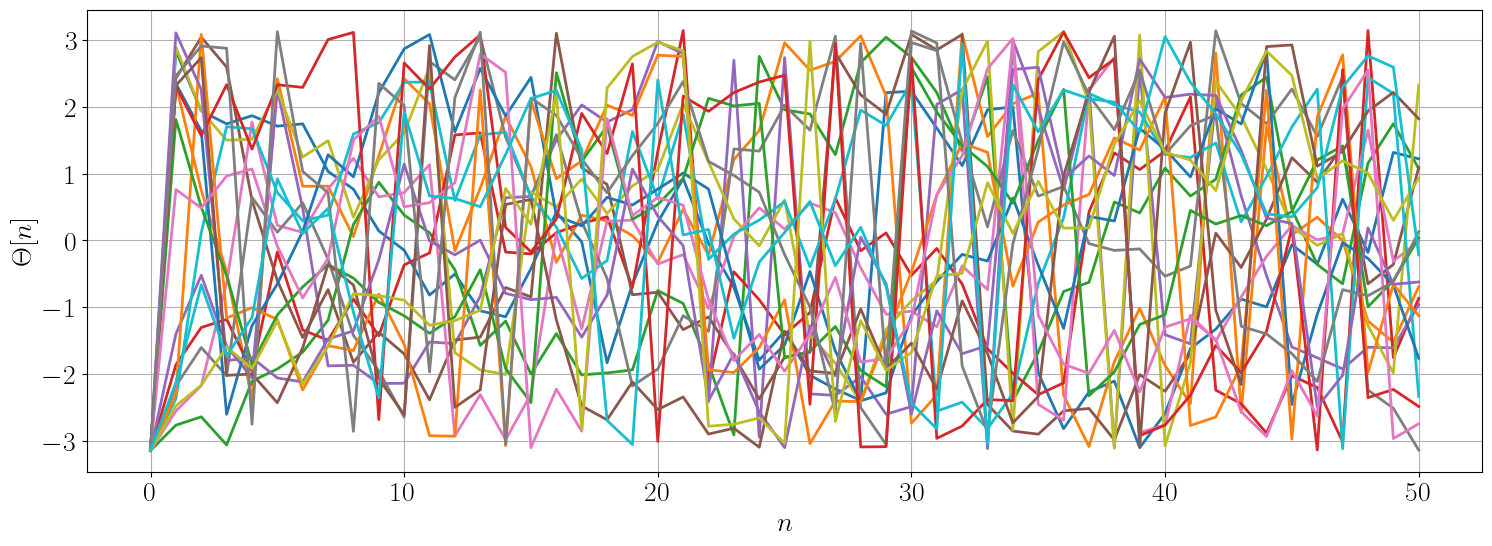

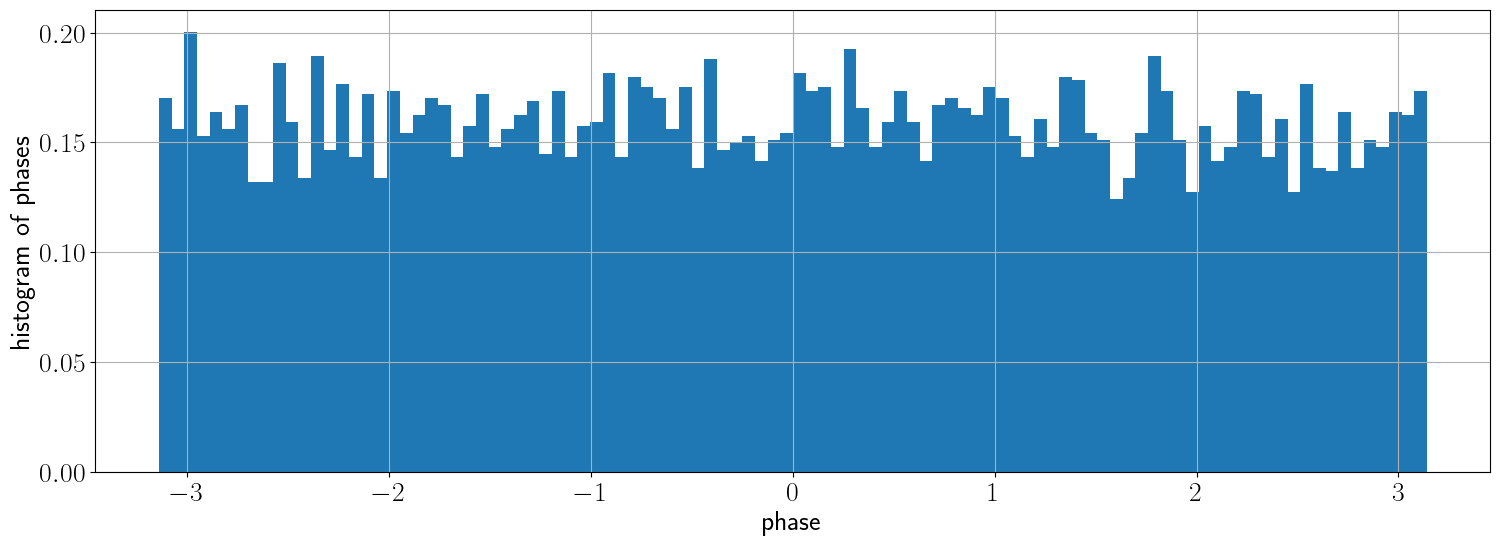

In [7]:
# plotting
for n in np.arange( 20 ): 
    plt.plot( X_Wiener_phase_noise_mod_pi[ n, :], linewidth = 2.0 )    

plt.grid( True )
plt.xlabel('$n$')
plt.ylabel('$\\Theta[n]$')
#plt.margins(.1)

# extract end-points
results_end = X_Wiener_phase_noise_mod_pi[ : , -1 ]

# get histogram
num_bins = 2 * N_steps + 1
width = .2
bins = np.linspace( - np.pi, np.pi, num_bins, endpoint=True)

plt.figure()
plt.hist( results_end, bins=bins, density=1) ;
plt.grid(1)
plt.xlabel('phase')
plt.ylabel('histogram of phases')